In [18]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('../CollegeRookieStatLog3.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [19]:
df = df.drop(['Unnamed: 0'], axis=1)

In [21]:
df1 = df.replace('C-', 'C')
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,0,2000,PF
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,1,2000,PF
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,2,2000,PF
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,3,2000,SF
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,4,2000,SF


In [22]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,0,1,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,0,1,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,0,1,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,0,0,1,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,0,0,1,0


In [23]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,0,1,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,0,1,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,0,1,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,0,0,1,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,0,0,1,0


In [24]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,NBAPTS,Pk,Tm,Year,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,12.0,1,0,2000,2.0,0,1,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,4.9,2,1,2000,2.6,0,1,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,9.5,4,2,2000,1.9,0,1,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,11.9,5,3,2000,1.9,0,0,0,1,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,5.1,6,4,2000,2.0,0,0,0,1,0


In [25]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,0,1,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,0,1,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,0,1,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,0,0,1,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,0,0,1,0,2.3,0.8,0.6,0.4,5.1


In [26]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\si

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.791051,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,...,-0.343753,1.922575,-0.546974,-0.488141,-0.590708,2.633067,0.465495,1.554361,4.471507,1.548442
Stromile Swift,-0.974416,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,...,-0.343753,1.922575,-0.546974,-0.488141,-0.590708,0.618591,-0.593309,0.788456,2.283816,-0.134317
Marcus Fizer,0.282811,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,...,-0.343753,1.922575,-0.546974,-0.488141,-0.590708,0.989679,-0.099200,-0.232752,0.096124,0.955921
Mike Miller,-0.573174,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,...,-0.343753,-0.520136,-0.546974,2.048590,-0.590708,0.830641,0.324322,0.277852,-0.216403,1.524741
DerMarr Johnson,-1.455907,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,...,-0.343753,-0.520136,-0.546974,2.048590,-0.590708,-0.070572,-0.310961,0.277852,0.408652,-0.086916


In [28]:
df3 = df1[0:559]
df4 = df1[559:]

In [29]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mikal Bridges,0.791051,-0.307165,-0.653193,-0.893807,0.808101,-0.941013,-1.443159,2.386008,0.621146,0.435919,...,-0.343753,-0.520136,-0.546974,2.048590,-0.590708,0.406541,0.606669,2.830871,0.721179,0.671511
Shai Gilgeous-Alexander,-1.322160,1.073835,0.124944,0.073947,0.110191,0.452737,0.613708,-0.327525,-0.556740,-0.676652,...,-0.343753,-0.520136,1.828241,-0.488141,-0.590708,0.194491,1.453713,1.809663,0.721179,1.264032
Miles Bridges,-0.653422,0.620695,1.136521,1.149229,-0.151526,0.375306,0.270897,0.364894,1.275528,1.346205,...,-0.343753,-0.520136,-0.546974,2.048590,-0.590708,0.830641,-0.028613,0.533154,1.033706,0.481905
Jerome Robinson,0.710803,-0.781884,-1.586957,-1.359763,-0.674959,-1.405596,-1.400308,-0.757947,-0.294988,-0.272081,...,-0.343753,-0.520136,-0.546974,-0.488141,1.692883,-0.653710,-0.452135,-0.488053,-0.528930,-0.489830
Zhaire Smith,-1.322160,-0.069806,-0.419752,-0.893807,1.348982,-0.011847,-0.329023,1.057313,-0.687617,-0.878938,...,-0.343753,-0.520136,-0.546974,-0.488141,1.692883,-0.123584,0.324322,-0.488053,0.096124,0.292298


In [30]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [31]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [32]:
test_y.tail()

""
Name
Jaren Jackson
Trae Young
Mohamed Bamba
Collin Sexton
Kevin Knox


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


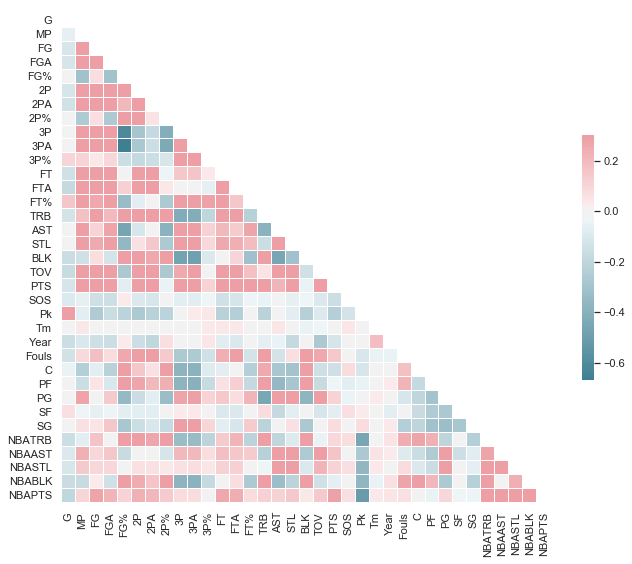

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 30)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

In [ ]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,37):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
import seaborn as sns
test_y2 = test_y2[test_y2['prediction'] > 0]
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
from scipy import stats
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

In [ ]:
webdata = pd.DataFrame(test_y2['NBAPTS'].values, columns=['Real'])
webdata['pred1'] = test_y2['prediction'].values
webdata['hue1'] = test_y2['Pred'].values
webdata['chip1'] = test_y2['chip'].values

## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=22, n_estimators=1000,max_depth=4, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

In [ ]:
webdata['pred2'] = test_y2['prediction'].values
webdata['hue2'] = test_y2['Pred'].values
webdata['chip2'] = test_y2['chip'].values

## Cross Validated Extra Trees

In [ ]:
from sklearn.model_selection import cross_val_score
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')

In [ ]:
from sklearn.model_selection import cross_val_predict
train_y2 = cross_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(cross_val_predict(reg, cross_x, cross_y.NBAPTS, cv=5))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('overall mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

In [ ]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("CV Points Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('overall mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

In [ ]:
train_y2['chip'] = (train_y2['NBAPTS'] - train_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = train_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[abs(train_y2['chip'])<=2])/len(train_y2),2)) + "% of NBA Rookies within 2 points.")

## Grid Search on Extra Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(2,28,2),
              'min_samples_split': np.arange(2,11),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [ ]:
grid.fit(cross_x, cross_y);

In [ ]:
grid.best_params_

In [ ]:
reg = ExtraTreesRegressor(min_samples_split=5, n_estimators=200, max_depth=18, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14)
reg.fit(train_x.values, train_y.NBAPTS.values)

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

In [ ]:
webdata['pred3'] = test_y2['prediction'].values
webdata['hue3'] = test_y2['Pred'].values
webdata['chip3'] = test_y2['chip'].values

## XGBoost

In [ ]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=16, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

In [ ]:
webdata['pred4'] = test_y2['prediction'].values
webdata['hue4'] = test_y2['Pred'].values
webdata['chip4'] = test_y2['chip'].values

## Feed Forward Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [ ]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
from sklearn.model_selection import KFold
X = cross_x.values
Y = cross_y.NBAPTS.values
seed = 10
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=False, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    #model.add(Dropout(0.2))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[r2_keras])
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=False)
    out = model.fit(X[train], Y[train], validation_data=[X[test], Y[test]], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    scores = model.evaluate(X[test], Y[test], verbose=0)
    cvscores.append(scores[1])
print('The Cross Validation Score is ' + str(round(100*np.mean(cvscores),2)))

In [ ]:
webdata['pred5'] = test_y2['prediction'].values
webdata['hue5'] = test_y2['Pred'].values
webdata['chip5'] = test_y2['chip'].values

## LSTM

In [ ]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [ ]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='linear', recurrent_regularizer=regularizers.l2(0.32),kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(50, activation='linear'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=50, verbose=0, shuffle=False, callbacks=[early_stop])

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
webdata['pred6'] = test_y2['prediction'].values
webdata['hue6'] = test_y2['Pred'].values
webdata['chip6'] = test_y2['chip'].values

## TPOT

In [ ]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())

In [ ]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [ ]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [ ]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [ ]:
cvs = cross_val_score(tpot, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

In [ ]:
webdata['pred7'] = test_y2['prediction'].values
webdata['hue7'] = test_y2['Pred'].values
webdata['chip7'] = test_y2['chip'].values

## Differences

In [ ]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

In [ ]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

In [ ]:
webdata2 = webdata.round(2)
webdata2 = webdata2.replace('Very Inaccurate', 'rgb(171, 79, 82)')
webdata2 = webdata2.replace('Inaccurate', 'rgb(193, 127, 83)')
webdata2 = webdata2.replace('Accurate', 'rgb(113, 162, 104)')
webdata2 = webdata2.replace('Very Accurate', 'rgb(87, 110, 167)')
webdata2['level_0'] = webdata2.index
webdata2['Name'] = test_y2.index
webdata2.to_csv('RookieModelsData.csv')

## 2019 Predictions

In [ ]:
train=df3
test=df4
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [ ]:
test_y.head()

In [ ]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 30)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,37):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14).fit(train_x3.values, train_y[col].values.ravel())
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

In [ ]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

In [ ]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model should be able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model should be able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

## Results

In [ ]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]
test_y2['NBABLK'] = test_y2['NBABLK'].abs()

In [ ]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

In [ ]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [ ]:
test_y2['NBAPTS'].mean()

In [ ]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

In [ ]:
dfn = pd.read_csv('CollegeRookieStatLog5.csv')
dfnm = pd.read_csv('NewRookiePredictions4-1.csv')
dfn = dfn[['Name','Pos']]
finaly = test_y2.merge(dfn, left_on='Name', right_on='Name')
finaly['Glitch'] = dfnm['Glitch'].values
finaly.head()

In [ ]:
finaly.to_csv('NewRookiePredictions4-1.csv')

## Draft Night vs Results

In [ ]:
college2 = pd.read_csv('2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions4-1.csv')

In [ ]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0','Glitch'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [ ]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

## Added Value

In [ ]:
dfm = pd.read_csv('fixlater2.csv')
dfm = dfm[['Name','Pk','Tm']]
finaly = dfo.merge(dfm, left_on='Name', right_on='Name')
finaly.Tm = finaly.Tm.str[:-4]
finaly = finaly.sort_values('Pk', ascending=True)
finaly.head()

In [ ]:
finaly['diff'] = finaly.sort_values('Pk', ascending=True)['Value'].values - finaly.sort_values('Value', ascending=False)['Value'].values

In [ ]:
teams = finaly.Tm.unique()
av = []
for t in teams:
    av.append(t)
    finaly2 = finaly[finaly['Tm']==t]
    av.append(finaly2['NBAPTS'].sum())
    av.append(finaly2['NBAAST'].sum())
    av.append(finaly2['NBATRB'].sum())
    av.append(finaly2['NBASTL'].sum())
    av.append(finaly2['NBABLK'].sum())
    av.append(finaly2['Value'].sum())
    av.append(finaly2['diff'].sum())
    av.append(len(finaly2))
av2 = np.array(av)
refined = np.reshape(av2, (-1, 9))
teamdf = pd.DataFrame(refined, columns=['Team','Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num'])
cols=['Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num']
for col in cols:
    teamdf[col] = pd.to_numeric(teamdf[col], errors='coerce')

In [ ]:
teamdf = teamdf.set_index('Team')
df1_styler = teamdf[['Points']].sort_values('Points', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Scoring:')
df2_styler = teamdf[['Assists']].sort_values('Assists', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Passing:')
df3_styler = teamdf[['Rebounds']].sort_values('Rebounds', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Rebounding:')
df4_styler = teamdf[['Steals']].sort_values('Steals', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Stealing:')
df5_styler = teamdf[['Blocks']].sort_values('Blocks', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Blocking:')
display_html(df1_styler._repr_html_()+' '+df2_styler._repr_html_()+' '+df3_styler._repr_html_()+' '+df4_styler._repr_html_()+' '+df5_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = teamdf[['Value']].sort_values('Value', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Value:')
df2_styler = teamdf[['Grade']].sort_values('Grade', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Grade:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
teamdf['Exp'] = teamdf['Value'] - teamdf['Grade']

trace1 = go.Scatter(
    y = teamdf['Value'],
    x = teamdf['Exp'],
    text= teamdf.index,
    mode='markers',
    marker=dict(
        size=16,
        color = teamdf['Grade'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]
layout= go.Layout(
    title= 'Value Added by Teams in NBA Draft',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Expected Value'
    ),
    yaxis=dict(
        title= 'Actual Value'
    ),
    showlegend= False
)
fig= go.Figure(data, layout=layout)
py.iplot(fig)